### Loan Prediction: An End-to-End Machine Learning Project

1. Problem statement

We want to build machine learning models to predict if a loan will get approved or not based on the provided features in the dataset.

Questions to ask boss:
- What is the exact business objective? --save cost, save manual work hours
- What the current solution looks like, if any? ->reference for perforamcne --currently estimated manually by experts

2. Get the data

The dataset includes fields on loan applications. 

Dataset: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset/data

3. Explore and visualize the data to gain insights
4. Prepare the data for ML algorithms
5. select models and train them
6. fine-tune models
7. present solution
8. Launch, monitor, and maintain the system

### 1. Data preparation and data clearning


In [2]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import pickle

In [4]:
# read the dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- Loan_ID: Unique loan ID.
- Gender: Gender of the applicant.
- Married: Marital status.
- Dependents: Number of dependents.
- Education: Education level.
- Self_Employed: Whether the applicant is self-employed or not.
- ApplicantIncome: Applicant's income.
- CoapplicantIncome: Coapplicant's income.
- LoanAmount: Loan amount (in thousands).
- Loan_Amount_Term: Term of the loan in months.
- Credit_History: Credit history (1 means the applicant meets the credit guidelines).
- Property_Area: Property location.
- Loan_Status: Target variable (Y = loan approved, N = loan not approved).

In [5]:
# check the shape of the dataset
print("Shape of train dataset:", train.shape)

# columns
print("\nColumns of train dataset:", train.columns)

# check the data types
print("\nData types of train dataset:", train.dtypes)

Shape of train dataset: (614, 13)

Columns of train dataset: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data types of train dataset: Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [6]:
# check the missing values
print("\nMissing values in train dataset:\n", train.isnull().sum())


Missing values in train dataset:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Handling Missing Values:
1. For categorical variables (like Gender, Married, Dependents, Self_Employed, and Credit_History), we can impute missing values using the mode (most frequent value) of the column.
2. For numerical variables (like LoanAmount and Loan_Amount_Term), we can impute missing values using the median or mean of the column.

In [7]:
# handle mssing values
# Impute missing values for categorical variables using mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for column in categorical_columns:
    mode_value = train[column].mode()[0]
    train[column].fillna(mode_value, inplace=True)

# Impute missing values for numerical variables using median
numerical_columns = ['LoanAmount', 'Loan_Amount_Term']
for column in numerical_columns:
    median_value = train[column].median()
    train[column].fillna(median_value, inplace=True)

# Check again for missing values
print(train.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


The next step in data preparation is to convert categorical variables into a numerical format, typically done using techniques like one-hot encoding or label encoding.

- We use label encoding for binary categorical columns (like Gender, Married, Self_Employed, and Loan_Status).
- For non-binary categorical columns (like Dependents and Property_Area), we can use one-hot encoding.

In [8]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode binary categorical columns
binary_columns = ['Gender', 'Married', 'Self_Employed', 'Loan_Status', 'Education']
for column in binary_columns:
    train[column] = label_encoder.fit_transform(train[column])

# One-hot encode non-binary categorical columns
train = pd.get_dummies(train, columns=['Dependents', 'Property_Area'])

# Display the first few rows after encoding
train.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [9]:
# feature scaling, use standard scaler for numerical features
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])

# Display the first few rows after scaling
train.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1,1,0,0,0,0,0,1
1,LP001003,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0,1,0,0,1,0,0
2,LP001005,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1,1,0,0,0,0,0,1
3,LP001006,1,1,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1,1,0,0,0,0,0,1
4,LP001008,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1,1,0,0,0,0,0,1


### 2. EDA, feature importance analysis

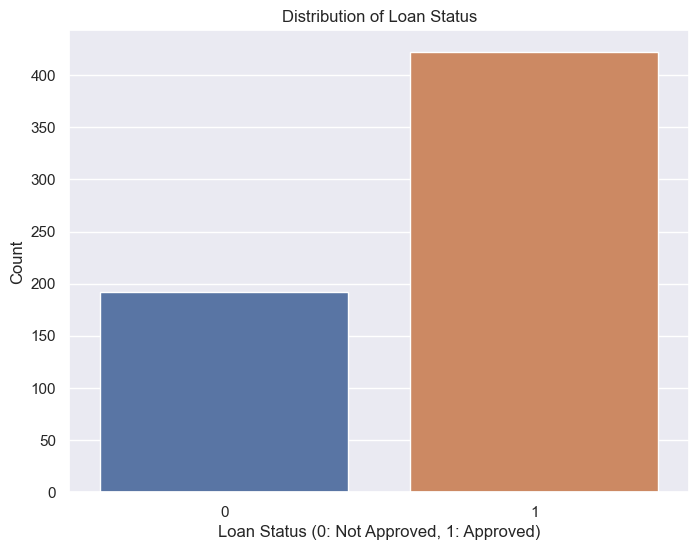

In [10]:
# Visualize the distribution of the target variable (Loan_Status)
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=train)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (0: Not Approved, 1: Approved)")
plt.ylabel("Count")
plt.show()

The dataset seems to be somewhat imbalanced, with more approved loans than unapproved ones.

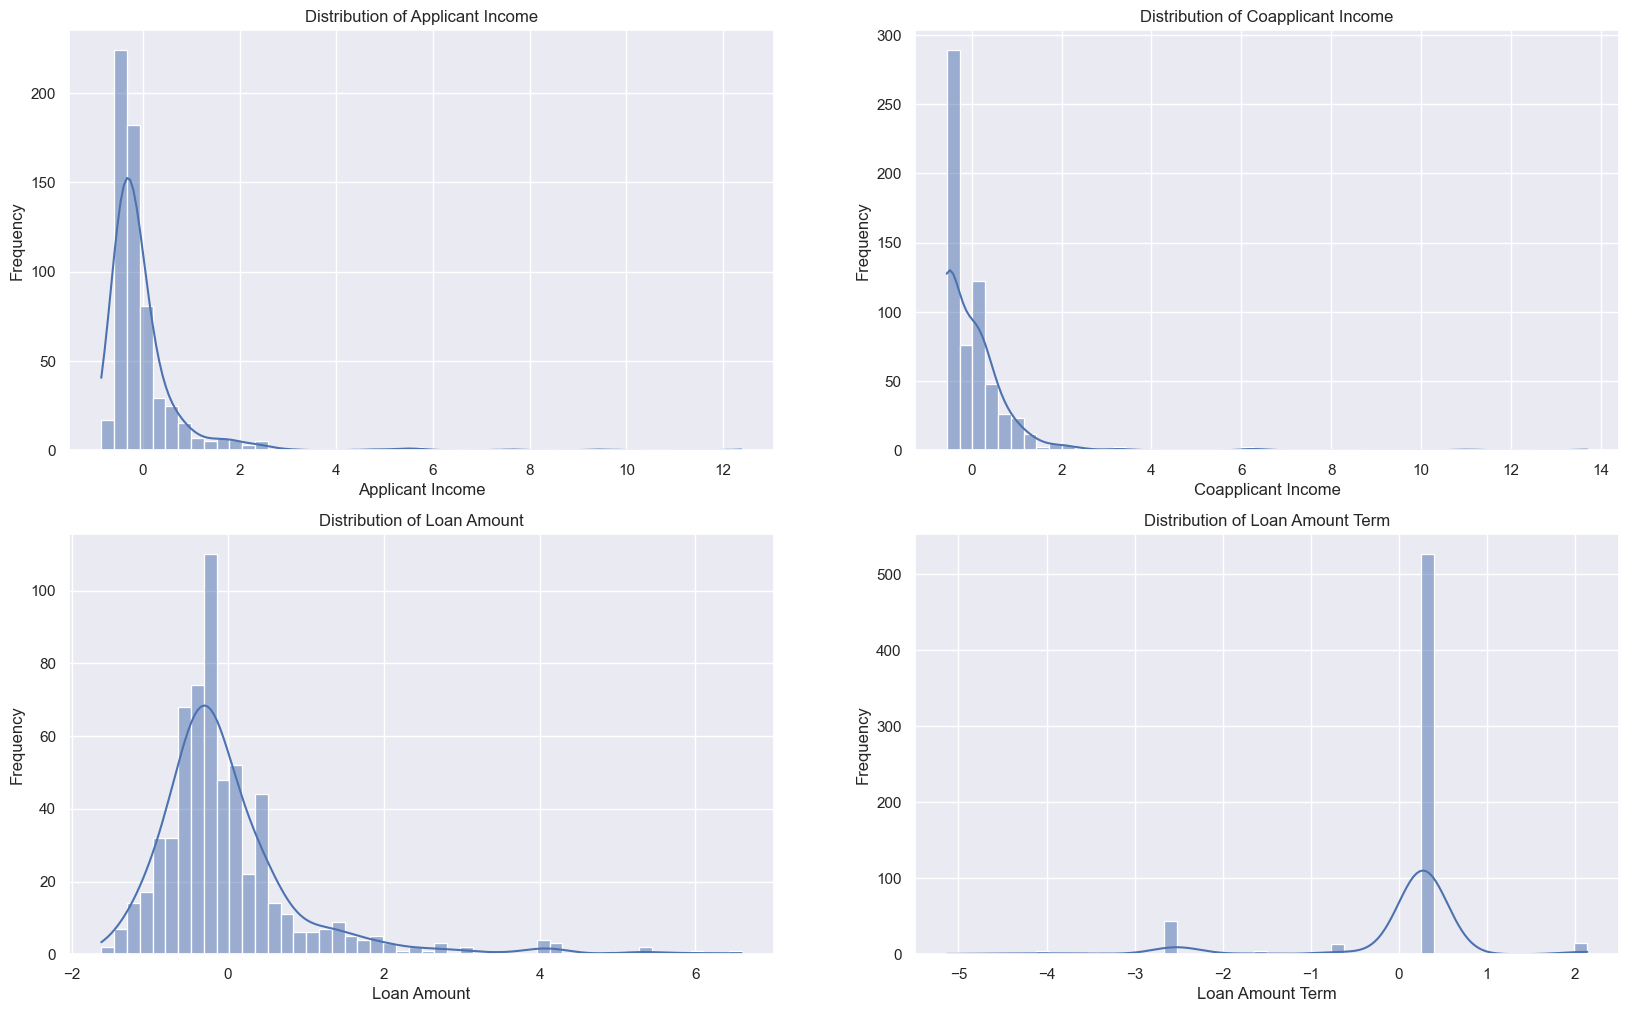

In [11]:
# visualize the distribution of applicantincome, coapplicantincome, loanamount, loan_amount_term in subplots
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.histplot(train['ApplicantIncome'], bins=50, kde=True)
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
sns.histplot(train['CoapplicantIncome'], bins=50, kde=True)
plt.title("Distribution of Coapplicant Income")
plt.xlabel("Coapplicant Income")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
sns.histplot(train['LoanAmount'], bins=50, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
sns.histplot(train['Loan_Amount_Term'], bins=50, kde=True)
plt.title("Distribution of Loan Amount Term")
plt.xlabel("Loan Amount Term")
plt.ylabel("Frequency")
plt.show()

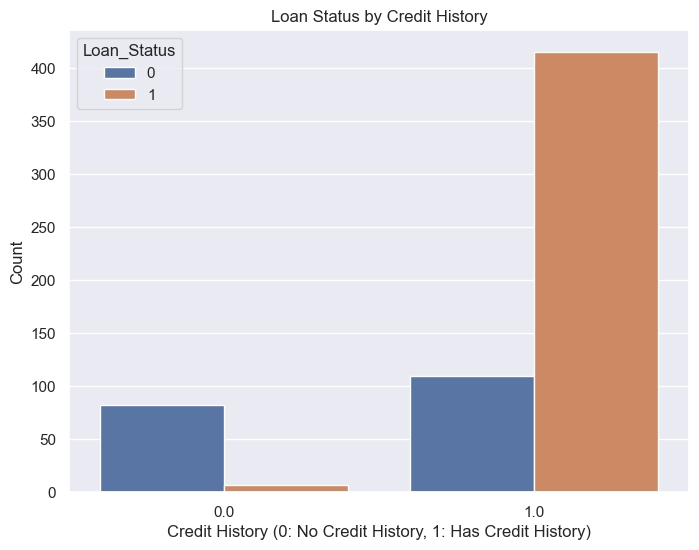

In [12]:
# plot the relationship between credit history and loan status
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train)
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (0: No Credit History, 1: Has Credit History)")
plt.ylabel("Count")
plt.show()

This indicates that Credit_History might be a significant predictor for loan approval status.

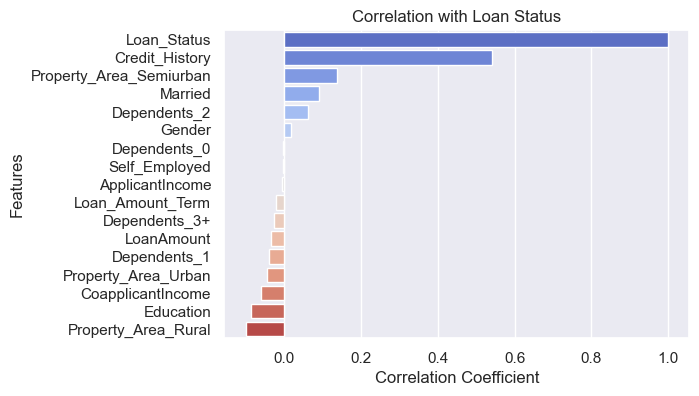

In [13]:
# Compute the correlation matrix
correlation_matrix = train.corr()

# Focus on correlations with the target variable (Loan_Status)
loan_status_corr = correlation_matrix["Loan_Status"].sort_values(ascending=False)

# Plot the correlation of features with Loan_Status
plt.figure(figsize=(6, 4))
sns.barplot(y=loan_status_corr.index, x=loan_status_corr.values, palette="coolwarm")
plt.title("Correlation with Loan Status")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

Features like Property_Area_Semiurban and Married also have some correlation with the target variable. Some features, like Property_Area_Rural, show a negative correlation, suggesting that being in a rural property area might be associated with a lower chance of loan approval.


### 3. Model selection process and parameter tuning

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest

In [14]:
# Drop non-predictive columns and prepare the feature set
X_train_full = train.drop(columns=['Loan_ID', 'Loan_Status'])

# Prepare the target variable
y_train_full = train['Loan_Status']

In [15]:
# print the shape of X_train_full and y_train_full
print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train_full:", y_train_full.shape)

Shape of X_train_full: (614, 16)
Shape of y_train_full: (614,)


#### 3.1 Logistic Regression

Hyperparameter tuning can often lead to significant improvements in model performance.

For hyperparameter tuning, one common approach is to use GridSearchCV or RandomizedSearchCV from the sklearn library. These tools search over specified hyperparameter values and find the best combination based on cross-validated performance.

For Logistic Regression, some important hyperparameters to consider are:

- C (Inverse of regularization strength): Smaller values specify stronger regularization.
- penalty (Regularization type): "l1" (Lasso) or "l2" (Ridge)
- solver: Algorithm to use in the optimization problem. For smaller datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large datasets.
- max_iter: Maximum number of iterations for the solvers to converge.
- class_weight: Weights associated with classes. This can be useful if the classes are imbalanced.
- fit_intercept: Specifies if a constant (a.k.a bias or intercept) should be added to the decision function.


In [16]:
# print model metrics
def get_model_metrics(y_true, y_pred):
    metrics = {'Accuracy': accuracy_score(y_true, y_pred),
               'Precision': precision_score(y_true, y_pred),
               'Recall': recall_score(y_true, y_pred),
               'F1 Score': f1_score(y_true, y_pred),
               'ROC AUC Score': roc_auc_score(y_true, y_pred)}
    return metrics

# confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Not Approved', 'Approved']
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ming/miniconda3/lib/python3.9/site-packages/sklearn/linear_mode

Best parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.8145949288806431

Best model: LogisticRegression(C=0.1, max_iter=50, penalty='l1', random_state=42,
                   solver='liblinear')
{'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'ROC AUC Score': 0.7030523255813954}


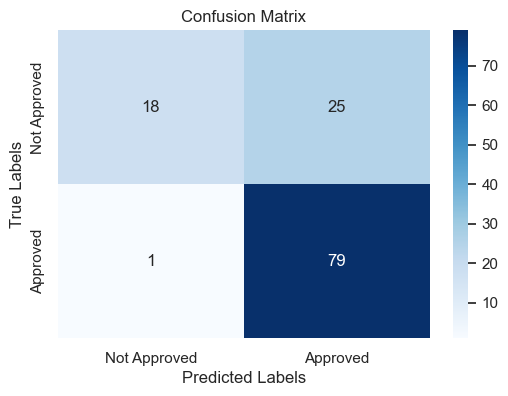

In [17]:
# Splitting the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Define an extended set of hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    # 'saga' solver supports both l1 and l2 penalty
    'solver': ['liblinear', 'saga'],
    'max_iter': [50, 100, 200, 300],
    # add class_weight if we suspect class imbalance
    'class_weight': ['balanced', None]
}

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best score
best_score = grid_search.best_score_
print("Best score:", best_score)

# Get the best model
best_model_logreg = grid_search.best_estimator_
print("\nBest model:", best_model_logreg)

# Make predictions on validation data
y_pred_lr = best_model_logreg.predict(X_val)

# Evaluate the model's performance on the validation set
logreg_val_metrics = get_model_metrics(y_val, y_pred_lr)
print(logreg_val_metrics)

# plot confusion matrix
plot_confusion_matrix(y_val, y_pred_lr)

In [18]:
# save the trained model to a pickle file
with open('logreg.pkl', 'wb') as file:
    pickle.dump(best_model_logreg, file)

print("Model saved!")

Model saved!



- True Positives (TP): 79 loans were correctly predicted as approved.
- True Negatives (TN): 18 loans were correctly predicted as not approved.
- False Positives (FP): 25 loans were incorrectly predicted as approved.
- False Negatives (FN): 1 loans were incorrectly predicted as not approved.

The evaluation metrics suggest that the logistic regression model has moderate predictive power for loan approval status with an accuracy of approximately 78.86%. The high recall (98.75%) indicates that the model is very good at identifying loan approvals, but this is at the cost of precision (75.96%), which means it is less adept at predicting loan rejections (as evidenced by a higher number of false positives). The F1 score, which balances precision and recall, is fairly high at 85.87%, suggesting a good harmonic mean between the two metrics for the positive class (loan approved).

The AUC-ROC score, which measures the ability of the model to distinguish between classes, is 70.31%. This is better than a random guess but indicates room for improvement, as a score closer to 100% would be indicative of a more robust model.




#### 3.2 SVM

Support Vector Machine (SVM) is a powerful, supervised machine learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best divides a dataset into classes. The strength of SVM lies in its use of kernels, which allow the algorithm to operate in a high-dimensional space, enabling it to capture complex relationships in the data.

SVM is an attractive option because it can handle both linear and non-linear boundaries, depending on the choice of the kernel. This flexibility allows SVM to model a more nuanced separation between loans that will be approved and those that won't, potentially leading to better performance than simpler linear models, especially if the decision boundary is not linear. SVM can also work well with smaller datasets and can be robust against overfitting, particularly in high-dimensional spaces, making it a suitable candidate for financial decision-making tasks where the cost of misclassification can be high.



Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8145949288806431
Best model: SVC(C=0.1, kernel='linear', random_state=42)
{'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'ROC AUC Score': 0.7030523255813954}


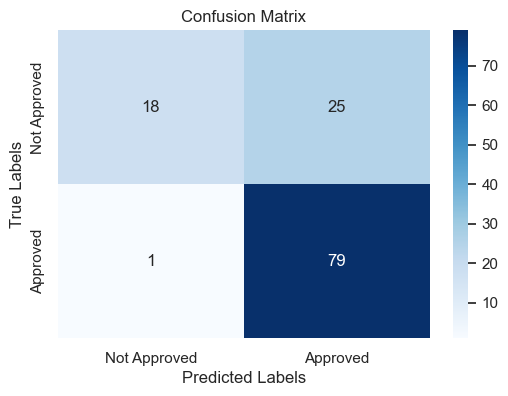

In [139]:
# Splitting the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],  # 'scale' is default for SVC
}

# Initialize the SVM model
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
print("Best model:", best_svm)

# Make predictions on validation data
y_pred_svm = best_svm.predict(X_val)

# Evaluate the best model's performance on the validation set
svm_val_metrics = get_model_metrics(y_val, y_pred_svm)
print(svm_val_metrics)

# plot confusion matrix
plot_confusion_matrix(y_val, y_pred_svm)

#### 3.3 Decision Tree

In [128]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training set
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dt = dt_classifier.predict(X_val)

# Evaluate the model's performance on the validation set
dt_val_metrics = get_model_metrics(y_val, y_val_pred_dt)
print(dt_val_metrics)

{'Accuracy': 0.6991869918699187, 'Precision': 0.7471264367816092, 'Recall': 0.8125, 'F1 Score': 0.778443113772455, 'ROC AUC Score': 0.6504360465116279}


Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8145949288806431
{'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'ROC AUC Score': 0.7030523255813954}


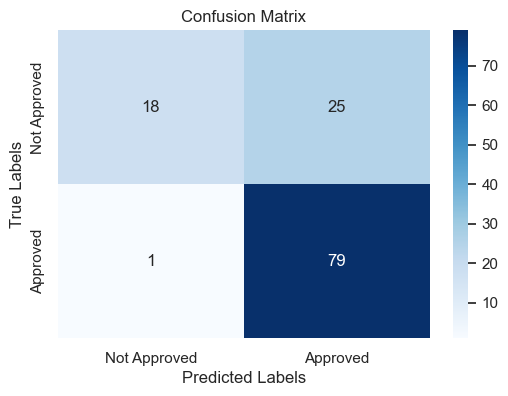

In [131]:
# Define the parameter grid for the Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Initialize the GridSearchCV object
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
dt_grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = dt_grid_search.best_params_

# Output the best parameters
print("Best parameters:", best_params)
print("Best score:", dt_grid_search.best_score_)

# Use the best estimator to make predictions on the validation set
y_pred_dt = dt_grid_search.best_estimator_.predict(X_val)

# Evaluate the best model's performance on the validation set
dt_metrics = get_model_metrics(y_val, y_pred_dt)
print(dt_metrics)

# plot confusion matrix
plot_confusion_matrix(y_val, y_pred_dt)

#### 3.4 Random Forest

Random Forest is an ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting.



In [132]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training set
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = rf_classifier.predict(X_val)

# Evaluate the Random Forest model's performance on the validation set
rf_val_metrics = get_model_metrics(y_val, y_val_pred_rf)
print(rf_val_metrics)

{'Accuracy': 0.7723577235772358, 'Precision': 0.76, 'Recall': 0.95, 'F1 Score': 0.8444444444444444, 'ROC AUC Score': 0.6959302325581396}


Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
{'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'ROC AUC Score': 0.7030523255813954}


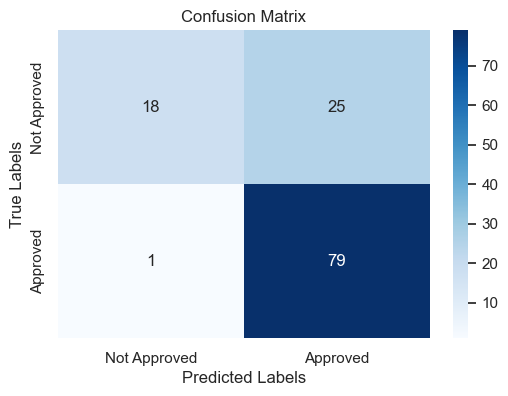

In [133]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = rf_grid_search.best_params_

# Output the best parameters
print("Best parameters:", best_params_rf)

# Use the best estimator to make predictions on the validation set
y_pred_rf = rf_grid_search.best_estimator_.predict(X_val)

# Evaluate the best model's performance on the validation set
rf_metrics = get_model_metrics(y_val, y_pred_rf)
print(rf_metrics)

# plot confusion matrix
plot_confusion_matrix(y_val, y_pred_rf)

#### 3.5 XGBoost

In [134]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the XGBoost model on the training set
xgb_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xgb = xgb_classifier.predict(X_val)

# Evaluate the XGBoost model's performance on the validation set
xgb_val_metrics = get_model_metrics(y_val, y_val_pred_xgb)
print(xgb_val_metrics)

{'Accuracy': 0.7317073170731707, 'Precision': 0.7526881720430108, 'Recall': 0.875, 'F1 Score': 0.8092485549132947, 'ROC AUC Score': 0.6700581395348837}


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
{'Accuracy': 0.7886178861788617, 'Precision': 0.7596153846153846, 'Recall': 0.9875, 'F1 Score': 0.8586956521739131, 'ROC AUC Score': 0.7030523255813954}


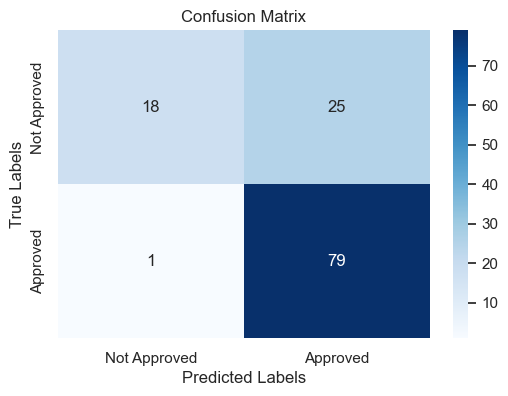

In [135]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the GridSearchCV object
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
xgb_grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = xgb_grid_search.best_params_

# Output the best parameters
print("Best parameters:", best_params_xgb)

# Use the best estimator to make predictions on the validation set
y_pred_xgb = xgb_grid_search.best_estimator_.predict(X_val)

# Evaluate the best model's performance on the validation set
xgb_metrics = get_model_metrics(y_val, y_pred_xgb)
print(xgb_metrics)

# plot confusion matrix
plot_confusion_matrix(y_val, y_pred_xgb)

In [137]:
# compare the performance of all the models
model_metrics = pd.DataFrame({
    'Logistic Regression': logreg_val_metrics,
    'SVM': svm_val_metrics,
    'Untuned Decision Tree': dt_val_metrics,
    'Decision Tree': dt_metrics,
    'Untuned Random Forest': rf_val_metrics,
    'Random Forest': rf_metrics,
    'Untuned XGBoost': xgb_val_metrics,
    'XGBoost': xgb_metrics
})

model_metrics

,Logistic Regression,SVM,Untuned Decision Tree,Decision Tree,Untuned Random Forest,Random Forest,Untuned XGBoost,XGBoost
Accuracy,0.788618,0.788618,0.699187,0.788618,0.772358,0.788618,0.731707,0.788618
Precision,0.759615,0.759615,0.747126,0.759615,0.760000,0.759615,0.752688,0.759615
Recall,0.987500,0.987500,0.812500,0.987500,0.950000,0.987500,0.875000,0.987500
F1 Score,0.858696,0.858696,0.778443,0.858696,0.844444,0.858696,0.809249,0.858696
ROC AUC Score,0.703052,0.703052,0.650436,0.703052,0.695930,0.703052,0.670058,0.703052


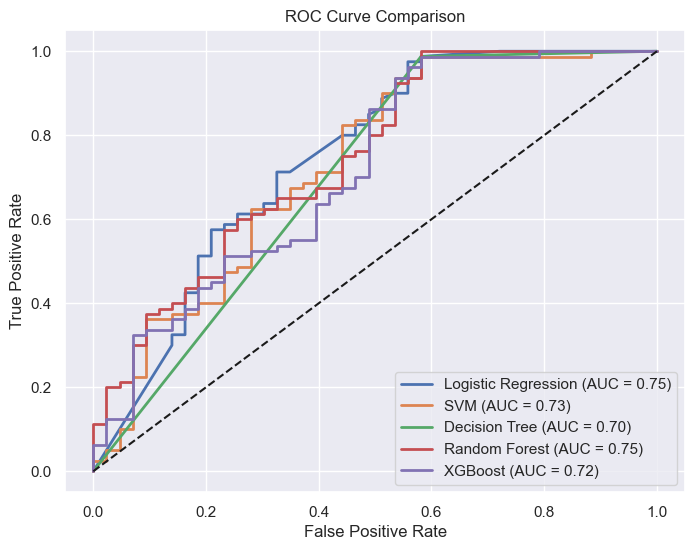

In [111]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# First, calculate the fpr and tpr for each model
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_val, best_model_logreg.predict_proba(X_val)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# For SVM, use decision_function if predict_proba is not available
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, best_svm.decision_function(X_val))
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, dt_grid_search.best_estimator_.predict_proba(X_val)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, rf_grid_search.best_estimator_.predict_proba(X_val)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, xgb_grid_search.best_estimator_.predict_proba(X_val)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Now plot all on the same graph
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_logreg, tpr_logreg, f"Logistic Regression (AUC = {roc_auc_logreg:.2f})")
plot_roc_curve(fpr_svm, tpr_svm, f"SVM (AUC = {roc_auc_svm:.2f})")
plot_roc_curve(fpr_dt, tpr_dt, f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plot_roc_curve(fpr_rf, tpr_rf, f"Random Forest (AUC = {roc_auc_rf:.2f})")
plot_roc_curve(fpr_xgb, tpr_xgb, f"XGBoost (AUC = {roc_auc_xgb:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


---

We need to prepare the testing dataset (handle missing values and encode categorical variables) in the same way we did for the training dataset. After that, we'll train the best model on the entire training dataset and evaluate it on the testing dataset.

In [39]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
# Handle missing values in the same manner as the training dataset

# Impute missing values for categorical variables using mode
for column in categorical_columns:
    mode_value = test[column].mode()[0]
    test[column].fillna(mode_value, inplace=True)

# Impute missing values for numerical variables using median
for column in numerical_columns:
    median_value = test[column].median()
    test[column].fillna(median_value, inplace=True)

# Convert categorical variables into a numerical format

# Label encode binary categorical columns
for column in binary_columns:
    if column != 'Loan_Status':  # Exclude target column as it's not present in the test dataset
        test[column] = label_encoder.fit_transform(test[column])

# One-hot encode non-binary categorical columns
test = pd.get_dummies(test, columns=['Dependents', 'Property_Area', 'Education'])

# Ensure the test dataset has the same columns as the training dataset
missing_cols = set(X_train_full.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

# Reorder test dataset columns to match the training dataset
test = test[X_train_full.columns]

# Display the first few rows of the prepared test dataset
test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,1,1,0,0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,1,1,0,0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,1,1,0,0,2340,2546,100.0,360.0,1.0,0,0,1,0,0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1


In [40]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the entire training dataset
logreg.fit(X_train_full, y_train_full)

# Predict on the testing dataset
y_test_pred = logreg.predict(test)

# Since the testing dataset doesn't have the 'Loan_Status' column, 
# we cannot compute performance metrics like accuracy, precision, etc., 
# directly. Instead, we'll just display the predictions.
y_test_pred[:10]  # Display the first 10 predictions

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])